In [1]:
import numpy as np
import pandas as pd
from DataProcessing import Data

runnnnnnn


# 1. Get Data 

## 1.1. Get Data from folder

In [2]:
d = Data()
d.get_index_names()

S&P 500: ['AAPL', 'ORCL', 'GOOGL', 'AMZN', 'BK', 'LIFE', 'T', 'XOM']
 VN: ['VHM', 'CTR', 'FPT', 'MBB']


['AAPL',
 'ORCL',
 'GOOGL',
 'AMZN',
 'BK',
 'LIFE',
 'T',
 'XOM',
 'VHM',
 'CTR',
 'FPT',
 'MBB']

In [3]:
chosen_index = 'GOOGL'

In [4]:
d.preprocess(chosen_index)

Processing GOOGL.csv
Saved GOOGL data at data/processed/GOOGL.csv


In [5]:
df = d.get_data(chosen_index)

In [6]:
df.head

<bound method NDFrame.head of             Date       Close    Volume        RSI        MFI         EMA  \
0     2019-04-23   63.529499  31868000  82.996834  80.719490   61.576761   
1     2019-04-24   63.002499  23396000  73.709528  73.223872   61.766859   
2     2019-04-25   63.367001  31344000  73.363243  74.164155   61.980211   
3     2019-04-26   63.870998  27228000  81.543462  80.707727   62.232316   
4     2019-04-29   64.809998  72368000  86.578417  88.889609   62.576007   
...          ...         ...       ...        ...        ...         ...   
1238  2024-03-22  150.770004  29175700  80.306152  65.483531  143.780577   
1239  2024-03-25  150.070007  19229300  80.250337  67.846138  144.619167   
1240  2024-03-26  150.669998  22149100  84.300456  74.234878  145.425945   
1241  2024-03-27  150.869995  22879200  82.576041  73.597553  146.151818   
1242  2024-03-28  150.929993  24485400  81.881658  72.906513  146.788908   

             SO        MACD  Next Day Price  
0     94.95

In [7]:
df.columns

Index(['Date', 'Close', 'Volume', 'RSI', 'MFI', 'EMA', 'SO', 'MACD',
       'Next Day Price'],
      dtype='object')

# 2. Train model

In [8]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import  train_test_split

In [9]:
X = df[df.columns[1:8]].values
Y = df[df.columns[8]].values

## 2.1. Split data

### 2.1.2. Unchronologically

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=37)

### 2.1.2. Chronologically

In [11]:
TRAIN_PERCENT = 0.7
train_size = int(TRAIN_PERCENT*len(X))

X_train = X[0:train_size]
Y_train = Y[0:train_size]
X_test = X[train_size:len(X)]
Y_test = Y[train_size:len(Y)]

## 2.2. Train model

In [12]:
model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)
model1 = GradientBoostingRegressor()
model1.fit(X_train,Y_train)
model1.score(X_test,Y_test)

0.9728165989805302

## Plot Result

In [13]:
import matplotlib.pyplot as plt

In [14]:
Y_predict = model.predict(X_test)
Y1_predict = model1.predict(X_test)

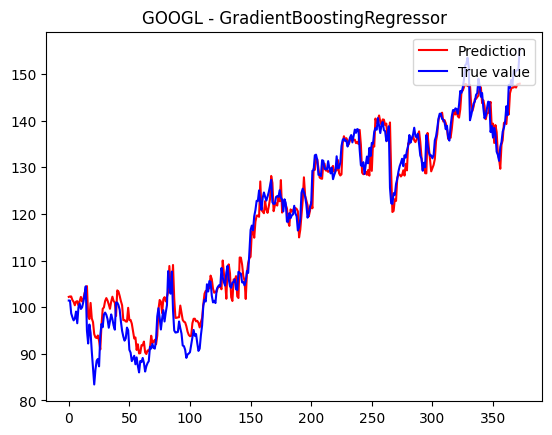

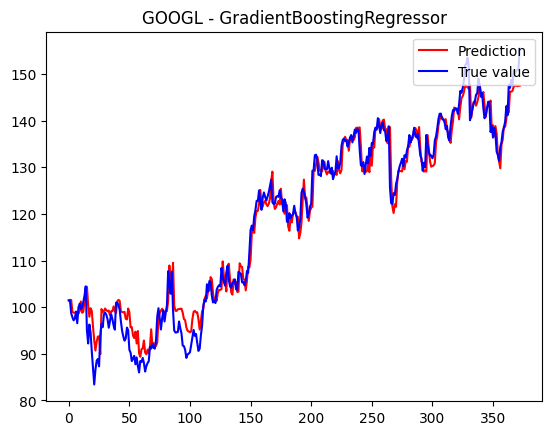

In [15]:
plt.plot(Y_predict,color='red',label='Prediction')
plt.plot(Y_test,color='blue',label='True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - GradientBoostingRegressor')
plt.show()
plt.plot(Y1_predict,color='red',label='Prediction')
plt.plot(Y_test,color='blue',label='True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - GradientBoostingRegressor')
plt.show()